## Portfolio Development Module

In [1]:
import pandas as pd
import numpy as np
import logging
import time
#import datetime as dt

#from dateutil.tz import gettz
#from queue import Queue, Empty
from typing import Any, Union, Optional, Dict
from typeguard import typechecked
from functools import partial
from abc import ABC, abstractmethod

#from event import FillEvent, OrderEvent
from data import CSVDataHandler
from strategy import Indicator, Policy, Strategy
from visual import StockTradingGraph
#from execution import SimulatedExecutionHandler

from constants import *

In [2]:
logging.basicConfig(level=logging.DEBUG,
                    format='[%(asctime)s %(levelname)-8s line %(lineno)s] %(funcName)30s: %(message)s',
                    datefmt='%a, %d %b %Y %H:%M:%S')

-----
### Loading data for examples

In [3]:
bars = CSVDataHandler('data', TIMEFRAME_DAY,
                      {'IMOEX':
                       {'src': 'finam', 'tz': 'Europe/Moscow'}
                      })
symbol = 'IMOEX'
df = bars.all_bars(symbol)

[Sat, 14 Mar 2020 14:48:31 DEBUG    line 171]                 _convert_files: No exact name is given. Take all files IMOEX<...>.csv
[Sat, 14 Mar 2020 14:48:31 DEBUG    line 180]                 _convert_files: No time column is given


In [4]:
df.head()

,open,high,low,close,volume
datetime,,,,,
2000-01-05,173.00,173.00,173.00,173.00,0.0
2000-01-06,186.26,186.26,186.26,186.26,0.0
2000-01-10,200.81,200.81,200.81,200.81,0.0
2000-01-11,199.57,199.57,199.57,199.57,0.0
2000-01-12,196.88,196.88,196.88,196.88,0.0


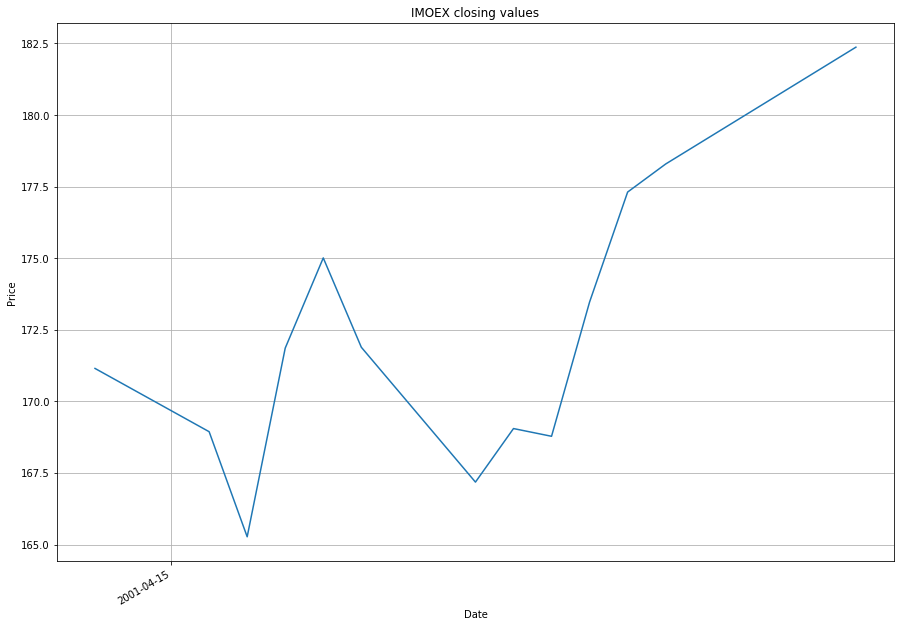

In [4]:
visualizer = StockTradingGraph()
visualizer.show_property(df.close, from_date='2001-04-15', to_date='2001-05-01', title='IMOEX closing values')

In [5]:
turnoverExit = Strategy(name = "Turn over and exit", 
                        long = Policy.down_cross_indicator, 
                        exLong = Policy.propagate,
                        short = Policy.up_cross_indicator, 
                        exShort = Policy.propagate,
                        enter_on_next = True,
                        modes = [MODE_ALL, MODE_LONGS, MODE_SHORTS], 
                        long_params = {'indicator': Indicator.sma, 
                                       'ret_val': SIGNAL_LONG,
                                       'window': 30}, 
                        exLong_params = {'ret_val': SIGNAL_EXIT,
                                         'window': 4},
                        short_params = {'indicator': Indicator.sma, 
                                        'ret_val': SIGNAL_SHORT,
                                        'window': 30}, 
                        exShort_params = {'ret_val': SIGNAL_EXIT,
                                          'window': 4})

[Sat, 14 Mar 2020 14:48:34 DEBUG    line 480]                       __init__: Number of variable parameters is 1


In [6]:
start = time.process_time()
res = turnoverExit.calculate_all(m = MODE_ALL, 
                                 long_params = {'prices': df.close}, 
                                 short_params = {'prices': df.close})
end = time.process_time()
print(end - start)
res[28:75]

[Sat, 14 Mar 2020 14:48:37 DEBUG    line 622]                  calculate_all: Strategy: Name=Turn over and exit


0.40625


datetime
2000-02-15    NaN
2000-02-16    NaN
2000-02-17   -1.0
2000-02-18    NaN
2000-02-21    NaN
2000-02-22    NaN
2000-02-23    0.0
2000-02-24    1.0
2000-02-25    NaN
2000-02-28    NaN
2000-02-29    NaN
2000-03-01    0.0
2000-03-02    1.0
2000-03-03    NaN
2000-03-06    NaN
2000-03-07    NaN
2000-03-09    0.0
2000-03-10    NaN
2000-03-13    NaN
2000-03-14    NaN
2000-03-15    NaN
2000-03-16    NaN
2000-03-17    NaN
2000-03-20    NaN
2000-03-21    NaN
2000-03-22    NaN
2000-03-23    NaN
2000-03-24    NaN
2000-03-27    NaN
2000-03-28    NaN
2000-03-29    NaN
2000-03-30    NaN
2000-03-31    NaN
2000-04-03    NaN
2000-04-04    NaN
2000-04-05    NaN
2000-04-06    NaN
2000-04-07    NaN
2000-04-10    NaN
2000-04-11    NaN
2000-04-12    NaN
2000-04-13   -1.0
2000-04-14    NaN
2000-04-17    NaN
2000-04-18    NaN
2000-04-19    0.0
2000-04-20    NaN
Name: close, dtype: float64

In [7]:
turnoverStrat = Strategy(name = "Simple turnover", 
                        long = Policy.down_cross_indicator, 
                        exLong = Policy.up_cross_indicator, 
                        short = Policy.up_cross_indicator, 
                        exShort = Policy.down_cross_indicator, 
                        modes = [MODE_ALL, MODE_LONGS, MODE_SHORTS], 
                        long_params = {'prices': df.close,
                                       'indicator': Indicator.sma, 
                                       'ret_val': SIGNAL_LONG,
                                       'window': 100}, 
                        exLong_params = {'prices': df.close,
                                         'indicator': Indicator.sma, 
                                         'ret_val': SIGNAL_EXIT,
                                         'window': 100},
                       short_params = {'prices': df.close,
                                       'indicator': Indicator.sma, 
                                       'ret_val': SIGNAL_SHORT,
                                       'window': 100}, 
                        exShort_params = {'prices': df.close,
                                         'indicator': Indicator.sma, 
                                         'ret_val': SIGNAL_EXIT,
                                         'window': 100})

[Sat, 14 Mar 2020 14:48:42 DEBUG    line 480]                       __init__: Number of variable parameters is 1


In [8]:
start = time.process_time()
res = turnoverStrat.calculate_all()
end = time.process_time()
print(end - start)
res[98:150]

[Sat, 14 Mar 2020 14:48:43 DEBUG    line 622]                  calculate_all: Strategy: Name=Simple turnover


0.421875


datetime
2000-05-29    NaN
2000-05-30   -1.0
2000-05-31    NaN
2000-06-01    NaN
2000-06-02    1.0
2000-06-05    NaN
2000-06-06    NaN
2000-06-07   -1.0
2000-06-08    1.0
2000-06-09    NaN
2000-06-13    NaN
2000-06-14   -1.0
2000-06-15    NaN
2000-06-16    NaN
2000-06-19    NaN
2000-06-20    NaN
2000-06-21    NaN
2000-06-22    NaN
2000-06-23    NaN
2000-06-26    NaN
2000-06-27    NaN
2000-06-28    NaN
2000-06-29    NaN
2000-06-30    NaN
2000-07-03    NaN
2000-07-04    NaN
2000-07-05    NaN
2000-07-06    NaN
2000-07-07    NaN
2000-07-10    NaN
2000-07-11    NaN
2000-07-12    NaN
2000-07-13    NaN
2000-07-14    NaN
2000-07-17    NaN
2000-07-18    NaN
2000-07-19    NaN
2000-07-20    NaN
2000-07-21    NaN
2000-07-24    NaN
2000-07-25    NaN
2000-07-26    NaN
2000-07-27    NaN
2000-07-28    NaN
2000-07-31    NaN
2000-08-01    NaN
2000-08-02    NaN
2000-08-03    NaN
2000-08-04    NaN
2000-08-07    NaN
2000-08-08    NaN
2000-08-09    1.0
Name: close, dtype: float64

-----
### Abstract Portfolio class

In [9]:
class Portfolio(ABC):
    """
    The Portfolio class handles the positions and market
    value of all instruments at a resolution of a "bar".
    """

    '''
    @abstractmethod
    def update_time(self, event):
        """
        Acts on a MarketEvent to update current positions.
        """
        raise NotImplementedError("Should implement update_signal()")
    
    @abstractmethod
    def update_signal(self, event):
        """
        Acts on a SignalEvent to generate new orders 
        based on the portfolio logic.
        """
        raise NotImplementedError("Should implement update_signal()")

    @abstractmethod
    def update_fill(self, event):
        """
        Updates the portfolio current positions and holdings 
        from a FillEvent.
        """
        raise NotImplementedError("Should implement update_fill()")
    '''
        
    @abstractmethod
    def apply_strategy(self, symbol, strategy):
        """
        Applies strategy to the symbol in vector format.
        """
        raise NotImplementedError("Should implement apply_strategy()")
        
    @abstractmethod
    def get_trades(self, symbol, strategy_name):
        """
        Returns a DataFrame with all trades
        """
        raise NotImplementedError("Should implement get_trades()")
        
    @abstractmethod
    def get_metrics(self, symbol, strategy_name):
        """
        Returns a DataFrame with calculated metrics
        """
        raise NotImplementedError("Should implement get_metrics()")

In [24]:
@typechecked
class NaivePortfolio(Portfolio):
    """
    The NaivePortfolio object is designed to send orders to
    a brokerage object blindly, i.e. without any risk management. 
    It is used to test simple strategies.
    """
    
    def __init__(self, bars, capital=10000.0, quantity = 1, 
                 events = None, symbols = None, calc_fee = True, 
                 fees = {'base':0.000354, 'min':0.5}):
        """
        Initialises the portfolio with bars and an event queue. 
        Also includes a starting datetime index and initial capital 
        (USD unless otherwise stated).

        Parameters:
        bars - The DataHandler object with current market data.
        capital - The starting capital in USD for each ticker.
        quantity - The number of shares to buy/sell. If =0, then go on maximum sum.
        events - The Event Queue object.
        symbols - List of tickers for processing. If =None, then take all in DataHandler.
        calc_fee - Whether or not fee is calculated.
        fees - Dictionary for fees calculations (base, min)
        """
        
        self.strategy_name = 'events'
        self.open_trade = {}
        self.bars_held = {}
        
        self._bars = bars
        self._capital = capital
        self._quantity = quantity
        self._events = events
        self._symbols = symbols
        self._calc_fee = calc_fee
        self._fees = fees
        
        self.visualizer = StockTradingGraph()
               
        self.positions = {} # (symbol, strategy) -> DataFrame during time
        self.trades = {} # (symbol, strategy) -> DataFrame of trades, summary
        self.metrics = {} # (symbol, strategy) -> DataFrame of calculated metrics
        
        # if in event mode, prepare dataframes for positions and trades
        '''
        if events is not None:
            if symbols is None: 
                self.symbols = self.bars.symbol_data.keys()
            for s in self.symbols:
                self.positions[(s, self.strategy_name)] = self._create_positions_df(s)
                self.trades[(s, self.strategy_name)] = pd.DataFrame(columns=['entry_date'])
                self.trades[(s, self.strategy_name)].set_index('entry_date', inplace = True)
        '''
    """
    def _create_positions_df(self, symbol):
        df = self.bars.get_all_bars(symbol).copy()[['open', 'high', 'low', 'close']]
        df['signal'] = 0
        df['position'] = 0
        df['bars'] = 0
        df['open_long'] = 0.0
        df['open_short'] = 0.0
        df['hl_cost'] = 0.0
        df['close_cost'] = 0.0 
        df['close_trade'] = 0.0
        df['fee'] = 0.0
        df['fee_total'] = 0.0
        df['profit'] = 0.0
        df['profit_fix'] = 0.0
        df['profit_total'] = 0.0
        df['total'] = self.capital
        df['equity'] = self.capital
        #df = df.apply(pd.to_numeric, downcast='float')       
        return df
    """
    
    def apply_strategies(self, symbol: str, m:Mode = MODE_ALL, 
                         long_price:str = 'close',
                         short_price:str = 'close', *argv) -> bool:
        result = True
        for strategy in argv:  
            logging.debug("Apply {} for symbol {}".format(strategy, symbol))
            df = self.apply_strategy(symbol, strategy, m, long_price, short_price)
            #self.get_trades(symbol, strategy.name, mode = 'longs')
        return result
    
    def apply_strategy(self, symbol: str, strategy: Strategy, 
                       m:Mode = MODE_ALL, long_price:str = 'close',
                       short_price:str = 'close') -> tpFrame:
        """
        Function is responsible for applying given strategy and calculating 
        dataframe with results
        
        Parameters:
        symbol - symbol in bars
        strategy - Strategy object
        m - mode of applying
        long_price - name of column for strategy application
        short_price - name of column for strategy application
        
        Returns:
        Dataframe with results
        """
        
        df = self._bars.all_bars(symbol).copy()[['open', 'high', 'low', 'close']]
        df['signal'] = strategy.calculate_all(m = MODE_ALL, 
                                 long_params = {'prices': df[long_price]}, 
                                 short_params = {'prices': df[short_price]})
        # make continuous signal: 1, 1, 1, 0, 0, 0 - without NaNs
        df['signal'].fillna(method='pad', inplace=True)
        if self._quantity == 0:
            logging.debug("Can not go for max sum in vector mode, let quantity = 1")
        quantity = self._quantity if self._quantity > 0 else 1
        # volume of the position, + for long, - for short
        df['position'] = quantity * df.signal.shift()
        df['position'].fillna(0, inplace=True)
        # number of bars held so far, + and - also
        df['bars'] = df.signal.groupby((df.signal != df.signal.shift()).cumsum()).cumsum().shift()
        df['bars'].fillna(0, inplace=True)
        # count prices of open positions
        df.loc[df.bars == 1, 'open_long'] = df.position * df.open
        df.loc[df.bars == 1, 'open_short'] = 0
        df.loc[df.bars == -1, 'open_short'] = df.position * df.open
        df.loc[df.bars == -1, 'open_long'] = 0
        df.loc[df.bars == 0, ['open_long', 'open_short']] = [[0, 0]]
        # propagate open prices while not exit
        df['open_long'].fillna(method='pad', inplace=True)
        df['open_short'].fillna(method='pad', inplace=True)
        # and propagate for one more bar for exit position
        df.loc[(df.bars >= 0) & (df.bars.shift() < 0), 'open_short'] = df.open_short.shift()
        df.loc[(df.bars <= 0) & (df.bars.shift() > 0), 'open_long'] = df.open_long.shift()
        # calculations for drawback and equity
        df['hl_cost'] = 0.0
        df.loc[df.position > 0, 'hl_cost'] = df.position * df.low    
        df.loc[df.position < 0, 'hl_cost'] = df.position * df.high
        df['close_cost'] = df.position * df.close 
        # close position
        df.loc[(df.position != df.position.shift()) & (df.position.shift() != 0), 'close_trade'] = df.position.shift() * df.open 
        df['close_trade'].fillna(0, inplace=True)
        # fees calculations
        df['fee'] = 0.0
        if self._calc_fee:
            df.loc[df.bars == 1, 'fee'] = np.maximum(df.open_long * self._fees['base'], self._fees['min'])
            df.loc[df.bars == -1, 'fee'] = np.maximum(abs(df.open_short) * self._fees['base'], self._fees['min'])
            df.loc[df.close_trade != 0, 'fee'] += np.maximum(abs(df.close_trade) * self._fees['base'], self._fees['min'])
        df['fee_total'] = df.fee.cumsum()
        # profit calculations
        df['profit'] = 0.0
        df.loc[df.open_long > 0, 'profit'] = df.close_trade + df.close_cost - df.open_long + df.open_short
        df.loc[df.open_short < 0, 'profit'] = df.close_trade + df.close_cost - df.open_short - df.open_long
        # fixed profit
        df['profit_fix'] = 0.0
        df.loc[df.close_trade > 0, 'profit_fix'] = df.close_trade - df.open_long
        df.loc[df.close_trade < 0, 'profit_fix'] = df.close_trade - df.open_short
        df['profit_total'] = df.profit_fix.cumsum()
        # total capital and equity calculations
        df['total'] = self._capital - df.fee_total + df.profit_total
        df['equity'] = df.total + df.profit - df.profit_fix
        #df = df.apply(pd.to_numeric, downcast='float')
        #self.positions[(symbol, strategy.name + ' ({0})'.format(mode))] = df
        return df

    def get_trades(self, origin: tpFrame, file:str = None) -> tpFrame:
        """
        Function is responsible for extracting trades from the given  
        dataframe in the WealthLab format
        
        Parameters:
        origin - DataFrame after strategy application
        file - file name for saving results
        
        Returns:
        Dataframe with trades
        """
        
        df = pd.DataFrame()
        # entering positions
        df['entry_date'] = origin[abs(origin.bars) == 1].index
        df.set_index('entry_date', inplace = True)
        df['quantity'] = abs(origin[abs(origin.bars) == 1].position)
        df.loc[origin[origin.bars == 1].index, 'position'] = 'LONG'
        df.loc[origin[origin.bars == -1].index, 'position'] = 'SHORT'
        if not df.loc[df.position == 'SHORT'].empty:
            df.loc[df.position == 'SHORT', 'entry_price'] = abs(origin.open_short)
        if not df.loc[df.position == 'LONG'].empty:
            df.loc[df.position == 'LONG', 'entry_price'] = origin.open_long
        # exiting positions
        ex_date = origin[origin.close_trade != 0].index.tolist()
        ex_price = abs(origin[origin.close_trade != 0].close_trade).tolist()
        profit = origin[origin.profit_fix != 0].profit_fix.tolist()
        # if the last trade was not closed
        if (len(ex_date) < df.shape[0]): 
            ex_date.append(np.nan)
            ex_price.append(np.nan)
        if (len(profit) < df.shape[0]): 
            profit.append(np.nan)
        df['exit_date'] = ex_date
        df['exit_price'] = ex_price
        # other parameters calculations
        df['profit, $'] = np.around(profit, decimals = 2)
        df['profit, %'] = np.around(profit / df.entry_price * 100, decimals = 2)
        df['bars_held'] = (abs(origin.loc[(origin.position != origin.position.shift(-1)) & (origin.position != 0), 'bars']) + 1).tolist()
        df['quantity'] = df['quantity'].astype('int32', copy = False)
        df['bars_held'] = df['bars_held'].astype('int32', copy = False)

        if file is not None:
            df.to_csv(file)    
        return df
        
    def get_metrics(self, origin:tpFrame, trades: tpFrame, strategy_name: str, 
                    metrics: tpFrame = None, file:str = None) -> tpFrame:
        """
        Function is responsible for calculating metrics, e.g. Profit factor
        
        Parameters:
        origin - DataFrame after strategy application
        trades - DataFrame with extracted trades
        strategy_name - Name of the stratedy for a header
        metrics - DataFrame of previously calculated metrics
        file - file name for saving results
        
        Returns:
        Dataframe with metrics
        """
        
        if metrics is None:
            metrics = pd.DataFrame(columns = ['Feature', strategy_name])
            metrics.set_index('Feature', inplace = True)
        
        tr_copy = trades.copy()
        if (pd.isnull(tr_copy.exit_date[-1])): 
            tr_copy.iloc[-1, tr_copy.columns.get_loc('exit_date')] = origin.index[-1]
            tr_copy.iloc[-1, tr_copy.columns.get_loc('exit_price')] = origin.close[-1]
            profit = origin.profit[-1]
            tr_copy.iloc[-1, tr_copy.columns.get_loc('profit, $')] = np.around(profit, decimals = 2)
            tr_copy.iloc[-1, tr_copy.columns.get_loc('profit, %')] = np.around(profit / tr_copy.entry_price[-1] * 100, decimals = 2)
        wins = tr_copy.loc[tr_copy['profit, $'] > 0]
        losses = tr_copy.loc[tr_copy['profit, $'] < 0]      
        
        metrics.loc['Net Profit', strategy_name] = np.around(tr_copy['profit, $'].sum(), decimals = 2)
        metrics.loc['Total Commission', strategy_name] =  origin.fee_total.max()
        num_trades = len(tr_copy)
        metrics.loc['Number of Trades', strategy_name] = num_trades
        metrics.loc['Average Profit', strategy_name] = np.around(metrics.loc['Net Profit', strategy_name] / num_trades, decimals = 2)
        metrics.loc['Average Profit, %', strategy_name] = np.around(tr_copy['profit, %'].mean(), decimals = 2)
        metrics.loc['Average Bars Held', strategy_name] = np.around(tr_copy['bars_held'].mean(), decimals = 2)
            
        num_win_trades = len(wins)
        metrics.loc['Winning Trades', strategy_name] = num_win_trades
        metrics.loc['Win Rate, %', strategy_name] = np.around(metrics.loc['Winning Trades', strategy_name] / num_trades * 100, decimals = 2)
        metrics.loc['Gross Profit', strategy_name] = sum(wins['profit, $'])
        metrics.loc['Avg Profit', strategy_name] = np.around(metrics.loc['Gross Profit', strategy_name] / num_win_trades, decimals = 2)
        metrics.loc['Avg Profit, %', strategy_name] = np.around(wins['profit, %'].mean(), decimals = 2)
        metrics.loc['Avg Winning Bars Held', strategy_name] = np.around(wins['bars_held'].mean(), decimals = 2)
        tr_copy.loc[:, 'consec'] = np.where(tr_copy['profit, $'] > 0, 1, 0)
        tr_copy.loc[:, 'consec'] = tr_copy.consec.groupby((tr_copy.consec == 0).cumsum()).cumcount()
        metrics.loc['Max Consecutive Winners', strategy_name] = tr_copy.consec.max()

        num_los_trades = len(losses)
        metrics.loc['Losing Trades', strategy_name] = num_los_trades
        metrics.loc['Loss Rate, %', strategy_name] = np.around(metrics.loc['Losing Trades', strategy_name] / num_trades * 100, decimals = 2)
        metrics.loc['Gross Loss', strategy_name] = sum(losses['profit, $'])
        metrics.loc['Avg Loss', strategy_name] = np.around(metrics.loc['Gross Loss', strategy_name] / num_los_trades, decimals = 2)
        metrics.loc['Avg Loss, %', strategy_name] = np.around(losses['profit, %'].mean(), decimals = 2)
        metrics.loc['Avg Losing Bars Held', strategy_name] = np.around(losses['bars_held'].mean(), decimals = 2)
        tr_copy.loc[:, 'consec'] = np.where(tr_copy['profit, $'] < 0, 1, 0)
        tr_copy.loc[:, 'consec'] = tr_copy.consec.groupby((tr_copy.consec == 0).cumsum()).cumcount()
        metrics.loc['Max Consecutive Losses', strategy_name] = tr_copy.consec.max()

        drawdown = origin.equity.cummax() - origin.equity
        metrics.loc['Maximum Drawdown', strategy_name] = np.around(drawdown.max(), decimals = 2)
        metrics.loc['Maximum Drawdown Date', strategy_name] = drawdown.idxmax()
            
        metrics.loc['Profit Factor', strategy_name] = np.around(metrics.loc['Gross Profit', strategy_name] / np.absolute(metrics.loc['Gross Loss', strategy_name]), decimals = 2)
        metrics.loc['Recovery Factor', strategy_name] = np.around(metrics.loc['Net Profit', strategy_name] / np.absolute(drawdown.max()), decimals = 2)
        metrics.loc['Payoff Ratio', strategy_name] = np.around(metrics.loc['Avg Profit', strategy_name] / np.absolute(metrics.loc['Avg Loss', strategy_name]), decimals = 2)
        
        if file is not None:
            metrics.to_csv(file)    
        return metrics

In [25]:
port = NaivePortfolio(bars, calc_fee = False)

In [26]:
df = port.apply_strategy(symbol, turnoverExit)
df[320:335]

[Sat, 14 Mar 2020 14:54:56 DEBUG    line 622]                  calculate_all: Strategy: Name=Turn over and exit


,open,high,low,close,signal,position,bars,open_long,open_short,hl_cost,close_cost,close_trade,fee,fee_total,profit,profit_fix,profit_total,total,equity
datetime,,,,,,,,,,,,,,,,,,,
2001-04-16,168.94,168.94,168.94,168.94,0.0,1.0,4.0,171.13,0.00,168.94,168.94,0.00,0.0,0.0,-2.19,0.00,82.70,10082.70,10080.51
2001-04-17,165.27,165.27,165.27,165.27,-1.0,0.0,0.0,171.13,0.00,0.00,0.00,165.27,0.0,0.0,-5.86,-5.86,76.84,10076.84,10076.84
2001-04-18,171.86,171.86,171.86,171.86,-1.0,-1.0,-1.0,0.00,-171.86,-171.86,-171.86,0.00,0.0,0.0,0.00,0.00,76.84,10076.84,10076.84
2001-04-19,175.01,175.01,175.01,175.01,-1.0,-1.0,-2.0,0.00,-171.86,-175.01,-175.01,0.00,0.0,0.0,-3.15,0.00,76.84,10076.84,10073.69
2001-04-20,171.89,171.89,171.89,171.89,-1.0,-1.0,-3.0,0.00,-171.86,-171.89,-171.89,0.00,0.0,0.0,-0.03,0.00,76.84,10076.84,10076.81
2001-04-23,167.18,167.18,167.18,167.18,0.0,-1.0,-4.0,0.00,-171.86,-167.18,-167.18,0.00,0.0,0.0,4.68,0.00,76.84,10076.84,10081.52
2001-04-24,169.05,169.05,169.05,169.05,1.0,0.0,0.0,0.00,-171.86,0.00,0.00,-169.05,0.0,0.0,2.81,2.81,79.65,10079.65,10079.65
2001-04-25,168.78,168.78,168.78,168.78,1.0,1.0,1.0,168.78,0.00,168.78,168.78,0.00,0.0,0.0,0.00,0.00,79.65,10079.65,10079.65
2001-04-26,173.47,173.47,173.47,173.47,1.0,1.0,2.0,168.78,0.00,173.47,173.47,0.00,0.0,0.0,4.69,0.00,79.65,10079.65,10084.34


In [27]:
tr = port.get_trades(origin = df)
tr.head(15)

,quantity,position,entry_price,exit_date,exit_price,"profit, $","profit, %",bars_held
entry_date,,,,,,,,
2000-02-18,1,SHORT,200.60,2000-02-24,207.16,-6.56,-3.27,5
2000-02-25,1,LONG,198.56,2000-03-02,201.49,2.93,1.48,5
2000-03-03,1,LONG,205.49,2000-03-10,241.53,36.04,17.54,5
2000-04-14,1,SHORT,245.87,2000-04-20,226.64,19.23,7.82,5
2000-05-05,1,LONG,249.96,2000-05-12,241.30,-8.66,-3.46,5
2000-05-15,1,SHORT,236.26,2000-05-19,218.30,17.96,7.60,5
2000-06-06,1,LONG,227.57,2000-06-13,226.09,-1.48,-0.65,5
2000-08-01,1,LONG,209.47,2000-08-07,221.28,11.81,5.64,5
2000-09-12,1,SHORT,225.59,2000-09-18,203.04,22.55,10.00,5


In [29]:
ms = port.get_metrics(df, tr, turnoverExit._name)
ms

,Turn over and exit
Feature,
Net Profit,1787.79
Total Commission,0
Number of Trades,244
Average Profit,7.33
"Average Profit, %",0.71
Average Bars Held,5
Winning Trades,141
"Win Rate, %",57.79
Gross Profit,4453.88


In [30]:
df = port.apply_strategy(symbol, turnoverStrat)
df[98:125]

[Sat, 14 Mar 2020 14:55:14 DEBUG    line 622]                  calculate_all: Strategy: Name=Simple turnover


,open,high,low,close,signal,position,bars,open_long,open_short,hl_cost,close_cost,close_trade,fee,fee_total,profit,profit_fix,profit_total,total,equity
datetime,,,,,,,,,,,,,,,,,,,
2000-05-29,213.67,213.67,213.67,213.67,NaN,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,10000.00,10000.00
2000-05-30,213.45,213.45,213.45,213.45,-1.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,10000.00,10000.00
2000-05-31,217.05,217.05,217.05,217.05,-1.0,-1.0,-1.0,0.00,-217.05,-217.05,-217.05,0.00,0.0,0.0,0.00,0.00,0.00,10000.00,10000.00
2000-06-01,221.10,221.10,221.10,221.10,-1.0,-1.0,-2.0,0.00,-217.05,-221.10,-221.10,0.00,0.0,0.0,-4.05,0.00,0.00,10000.00,9995.95
2000-06-02,224.94,224.94,224.94,224.94,1.0,-1.0,-3.0,0.00,-217.05,-224.94,-224.94,0.00,0.0,0.0,-7.89,0.00,0.00,10000.00,9992.11
2000-06-05,233.28,233.28,233.28,233.28,1.0,1.0,1.0,233.28,-217.05,233.28,233.28,-233.28,0.0,0.0,-16.23,-16.23,-16.23,9983.77,9983.77
2000-06-06,227.57,227.57,227.57,227.57,1.0,1.0,2.0,233.28,0.00,227.57,227.57,0.00,0.0,0.0,-5.71,0.00,-16.23,9983.77,9978.06
2000-06-07,218.56,218.56,218.56,218.56,-1.0,1.0,3.0,233.28,0.00,218.56,218.56,0.00,0.0,0.0,-14.72,0.00,-16.23,9983.77,9969.05
2000-06-08,228.73,228.73,228.73,228.73,1.0,-1.0,-1.0,233.28,-228.73,-228.73,-228.73,228.73,0.0,0.0,-4.55,-4.55,-20.78,9979.22,9979.22


In [31]:
tr = port.get_trades(origin = df, file = 'results/turnoverstrat.csv')

In [32]:
tr.tail(15)

,quantity,position,entry_price,exit_date,exit_price,"profit, $","profit, %",bars_held
entry_date,,,,,,,,
2018-10-25,1,LONG,2318.78,2018-10-29,2290.53,-28.25,-1.22,3
2018-10-29,1,SHORT,2290.53,2018-11-01,2352.94,-62.41,-2.72,4
2018-11-01,1,LONG,2352.94,2018-11-21,2336.47,-16.47,-0.70,14
2018-11-21,1,SHORT,2336.47,2018-11-22,2358.63,-22.16,-0.95,2
2018-11-22,1,LONG,2358.63,2018-11-26,2346.62,-12.01,-0.51,3
2018-11-26,1,SHORT,2346.62,2018-11-29,2398.54,-51.92,-2.21,4
2018-11-29,1,LONG,2398.54,2018-12-18,2341.60,-56.94,-2.37,14
2018-12-18,1,SHORT,2341.60,2019-01-03,2369.20,-27.60,-1.18,11
2019-01-03,1,LONG,2369.20,2019-08-15,2643.53,274.33,11.58,156


In [33]:
ms = port.get_metrics(df, tr, turnoverStrat._name, file = 'results/turnovermetr.csv')
ms

,Simple turnover
Feature,
Net Profit,528.59
Total Commission,0
Number of Trades,248
Average Profit,2.13
"Average Profit, %",0.5
Average Bars Held,20.65
Winning Trades,54
"Win Rate, %",21.77
Gross Profit,5223.35


In [88]:
port.apply_strategies(symbol, MODE_ALL, 'close', 'close', turnoverExit, turnoverStrat)

[Mon, 09 Mar 2020 13:42:15 DEBUG    line 82]               apply_strategies: Apply Strategy: Name=Turn over and exit for symbol IMOEX
[Mon, 09 Mar 2020 13:42:15 DEBUG    line 82]               apply_strategies: Apply Strategy: Name=Simple turnover for symbol IMOEX


True

In [34]:
import multiprocessing

print("Number of cpu : ", multiprocessing.cpu_count())

Number of cpu :  8


In [ ]:
    def update_time(self, event):
        """
        Makes use of a MarketEvent from the events queue.
        """
        if self.events is not None:
            for s in event.sym_list:
                if s in self.symbols:
                    df = self.positions[(s, self.strategy_name)]
                    df_idx, n = self.bars.get_latest_bars(s, N = 2)
                    if (n == 2):
                        fst = df_idx.index[0]
                        snd = df_idx.index[1]
                        df.loc[snd, 'signal'] = df.loc[fst, 'signal']
                        if df.loc[fst, 'position'] != 0:    
                            df.loc[snd, 'position'] = df.loc[fst, 'position']
                            df.loc[snd, 'bars'] = df.loc[fst, 'bars'] + np.sign(df.loc[fst, 'bars'])                           
                            df.loc[snd, 'close_cost'] = df.loc[snd, 'position'] * df.loc[snd, 'close']
                            if (df.loc[snd, 'position'] > 0): 
                                df.loc[snd, 'open_long'] = df.loc[fst, 'open_long']
                                df.loc[snd, 'hl_cost'] = df.loc[snd, 'position'] * df.loc[snd, 'low']
                                df.loc[snd, 'profit'] = df.loc[snd, 'close_cost'] - df.loc[snd, 'open_long']
                            else: 
                                df.loc[snd, 'open_short'] = df.loc[fst, 'open_short']
                                df.loc[snd, 'hl_cost'] = df.loc[snd, 'position'] * df.loc[snd, 'high']
                                df.loc[snd, 'profit'] = df.loc[snd, 'close_cost'] - df.loc[snd, 'open_short']
                        df.loc[snd, 'fee_total'] = df.loc[fst, 'fee_total']
                        df.loc[snd, 'profit_total'] = df.loc[fst, 'profit_total']
                        df.loc[snd, 'total'] = df.loc[fst, 'total']
                        df.loc[snd, 'equity'] = df.loc[snd, 'total'] + df.loc[snd, 'profit']
                if s in self.bars_held:
                    self.bars_held[s] += 1
                        
    def update_fill(self, event):
        """
        Updates the portfolio current positions and holdings 
        from a FillEvent.
        """
        if self.events is not None:
            direct = 0 # == 'EXIT ...'
            if event.direction == 'BUY': direct = 1
            if event.direction == 'SELL': direct = -1
            df = self.positions[(event.symbol, self.strategy_name)]
            tr = self.trades[(event.symbol, self.strategy_name)]
            idx = event.datetime

            df.loc[idx, 'position'] = direct * event.quantity
            df.loc[idx, 'bars'] = direct
            if df.loc[idx, 'bars'] == 0:
                # close trade
                df.loc[idx, 'hl_cost'] = 0
                df.loc[idx, 'close_cost'] = 0
                if event.direction == 'EXIT LONG':
                    df.loc[idx, 'close_trade'] = event.fill_cost
                    df.loc[idx, 'profit_fix'] =  df.loc[idx, 'close_trade'] -  df.loc[idx, 'open_long']
                elif event.direction == 'EXIT SHORT':
                    df.loc[idx, 'close_trade'] = -event.fill_cost
                    df.loc[idx, 'profit_fix'] =  df.loc[idx, 'close_trade'] -  df.loc[idx, 'open_short']
                df.loc[idx, 'profit_total'] += df.loc[idx, 'profit_fix']
                df.loc[idx, 'total'] = df.loc[idx, 'total'] + df.loc[idx, 'profit_fix']
               
                # save trade
                op_idx = self.open_trade[event.symbol]
                tr.loc[op_idx, 'exit_date'] = idx
                tr.loc[op_idx, 'exit_price'] = abs(event.fill_cost)
                profit = np.around(df.loc[idx, 'profit_fix'], decimals = 2)
                tr.loc[op_idx, 'profit, $'] = profit
                tr.loc[op_idx, 'profit, %'] = np.around(profit / tr.loc[op_idx, 'entry_price'] * 100, decimals = 2)
                tr.loc[op_idx, 'bars_held'] = int(self.bars_held[event.symbol])
                del self.open_trade[event.symbol]
                del self.bars_held[event.symbol]
                
            else: 
                # open new trade
                df.loc[idx, 'close_cost'] =  df.loc[idx, 'position'] *  df.loc[idx, 'close']        
                if event.direction == 'BUY':
                    df.loc[idx, 'open_long'] = direct * event.fill_cost
                    df.loc[idx, 'hl_cost'] = df.loc[idx, 'position'] * df.loc[idx, 'low']
                    df.loc[idx, 'profit'] += df.loc[idx, 'close_cost'] - df.loc[idx, 'open_long']
                else: #'SELL':
                    df.loc[idx, 'open_short'] = direct * event.fill_cost
                    df.loc[idx, 'hl_cost'] = df.loc[idx, 'position'] * df.loc[idx, 'high']
                    df.loc[idx, 'profit'] += df.loc[idx, 'close_cost'] - df.loc[idx, 'open_short']   
                
                # save trade
                tr.loc[idx, 'quantity'] = int(event.quantity)
                tr.loc[idx, 'position'] = 'LONG' if direct > 0 else 'SHORT'
                tr.loc[idx, 'entry_price'] = event.fill_cost
                self.open_trade[event.symbol] = idx
                self.bars_held[event.symbol] = 1
                
            # both for close and open events
            if self.calc_fee:
                df.loc[idx, 'fee']  += event.fee
                df.loc[idx, 'fee_total'] += event.fee
                df.loc[idx, 'total'] -= event.fee

    def update_signal(self, event):
        """
        Acts on a SignalEvent to generate new orders 
        based on the portfolio logic.
        """
        if self.events is not None:
            order = None
            strategy_name = event.strategy
            symbol = event.symbol
            direction = event.signal_type
            idx = event.datetime
            order_type = 'MKT'
            
            df = self.positions[(symbol, self.strategy_name)]
            if direction == 'EXIT':
                direct = df.loc[idx, 'signal']
                df.loc[idx, 'signal'] = 0
                quantity = df.loc[idx, 'position']
                if direct > 0:
                    order = OrderEvent(symbol, order_type, quantity, 'EXIT LONG')
                elif direct < 0:
                    order = OrderEvent(symbol, order_type, abs(quantity), 'EXIT SHORT')            
            else:
                trade = 'BUY' if direction == 'LONG' else 'SELL'
                df.loc[idx, 'signal'] = 1 if direction == 'LONG' else -1
                if self.quantity > 0:
                    order = OrderEvent(symbol, order_type, self.quantity, trade)
                else:
                    order = OrderEvent(symbol, order_type, self.quantity, trade, df.loc[idx, 'total'])      
            self.events.put(order)    

In [ ]:
    def show_property(self, symbol, strategy_name, prop, from_date = None, to_date = None):
        if (symbol, strategy_name) not in self.positions:
            print('Apply strategy first')
        else:
            y = self.positions[(symbol, strategy_name)]
            if prop in y.columns:
                self.visualizer.show_property(y[[prop]], from_date, to_date, "'{}' for ticker {}".format(prop, symbol))
            else:
                print('No such column exists')
                
    def show_ticker(self, symbol, strategy_name = None, show_trades = False, from_date = None, to_date = None):
        if show_trades: 
            if strategy_name is None:
                print('Please provide strategy_name for trades')
                show_trades = False
            elif (symbol, strategy_name) not in self.positions:
                print('Apply strategy first')
                show_trades = False
            elif (symbol, strategy_name) not in self.trades:
                self.get_trades(symbol, strategy_name)
        df = self.bars.get_all_bars(symbol)[['open', 'high', 'low', 'close']]
        tr = None if not show_trades else self.trades[(symbol, strategy_name)]
        self.visualizer.show_ticker(df, tr, from_date, to_date)